# Analiza zbioru danych New York Times

In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [12]:
import os

if not os.getcwd().endswith('lab1'):
    os.chdir('./lab1')

## Importowanie danych

In [13]:
df = pd.read_csv('./data/nyt-frame.csv', header=0)
data = df.iloc[:,9:]
array = data.values

In [14]:
df

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.000000,0.0,0.048151,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,music,0.006929,0.0,0.0,0.000000,0.000000,0.0,0.005600,0.0,...,0.000000,0.0,0.024425,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
98,99,music,0.111882,0.0,0.0,0.000000,0.000000,0.0,0.003716,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
99,100,music,0.006550,0.0,0.0,0.000000,0.000000,0.0,0.009301,0.0,...,0.000000,0.0,0.029686,0.015659,0.0,0.026605,0.0,0.0,0.0,0.0
100,101,music,0.009497,0.0,0.0,0.000000,0.040362,0.0,0.003070,0.0,...,0.000000,0.0,0.066953,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


## Przykładowe 20 wybranych elementów słownika (nagłówków kolumn)

In [5]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['goal' 'opposite' 'wouldnt' 'relative' 'pablo' 'enough' 'tenor'
 'matching' 'writers' 'smoke' 'picked' 'sports' 'choreographed'
 'recurring' 'founded' 'disk' 'accents' 'authorities' 'dinner' 'still']


## Transformacja PCA

In [6]:
pca = PCA(svd_solver='arpack')
X_pca = pca.fit_transform(array)

## Elementy 1. komponentu wiodącego

In [7]:
indexes_sorted = np.argsort(pca.components_[0])

### 15 elementów o największej wartości

Jak widzimy, 15 elementów o największej wartości odpowiada słowom, które najbliżej są skojarzone ze sztuką, a także zaimkom osobowym.

In [8]:
print(*np.array(header)[indexes_sorted[-15:]], sep='\n')

me
he
mrs
im
paintings
process
painting
my
cooper
mother
said
i
ms
her
she


### 15 elements with o najmniejszej wartości

Jak widzimy, 15 elementów o najmniejszej wartości stanowią głównie słowa związane ze sztuką oraz z muzyką.

In [9]:
print(*np.array(header)[indexes_sorted[:15]], sep='\n')

music
trio
theater
orchestra
composers
opera
theaters
m
program
players
festival
east
y
jersey
symphony


## Elementy 2. komponentu wiodącego

In [10]:
indexes_sorted2 = np.argsort(pca.components_[1])

### 15 elementów o największej wartości

Jak widać, są to słowa związane głównie z muzyką (w mniejszym stopniu ze sztuką, a także mamy kilka zaimków osobowych).

In [13]:
print(*np.array(header)[indexes_sorted2[-15:]], sep='\n')

vocal
orchestra
songs
musical
music
festival
production
sang
hour
i
ms
opera
theater
she
her


### 15 elementów o najmniejszej wartości

Elementy o najmniejszej wartości są już widocznie związane ze sztuką.

In [14]:
print(*np.array(header)[indexes_sorted2[:15]], sep='\n')

art
museum
images
artists
donations
museums
painting
tax
paintings
sculpture
gallery
sculptures
painted
white
service


Otrzymany wynik pokazuje, że pierwsza składowa jest związana z tematyką kultury (sztuka oraz muzyka), gdzie po jednej stronie osi dominują elementy związane ze sztuką, a po drugiej, elementy związane z muzyką oraz ze sztuką. Druga składowa już w sposób bardziej jednoznaczny rozgranicza elementy związane ze sztuką i elementy związane z muzyką. Po jednej stronie osi jest znacznie więcej słów, dotyczących sztuki, a po drugiej - muzyki.

## Wizualizacja wektorów cech zrzutowanych na 2 pierwsze komponenty wiodące

Poniższy wykres w graficzny sposób przedstawia nasze powyższe obserwacje. Widzimy, że naszej pierwszej składowej (1. komponentowi) odpowiada oś pozioma (X), natomiast drugiej składowej (2. komponentowi) - oś pionowa (Y).

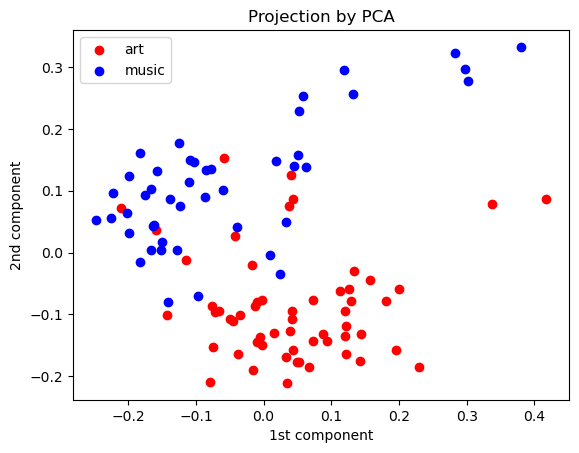

In [15]:
import matplotlib.pyplot as plt

reds = df['class.labels'] == 'art'
blues = df['class.labels'] == 'music'

plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend(["art", "music"])
plt.show()

## Wykres zależności wariancji od numeru kierunku wiodącego $k$

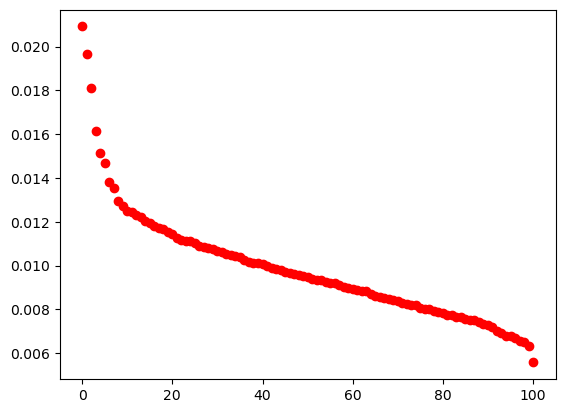

0.15773478029003477


In [17]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))

Jak widzimy, w przypadku zbioru słów, który analizujemy, 10 pierwszych komponentów zachowuje jedynie niecałe 16% wariancji. Oznacza to, że w przypadku tego zbioru słów, PCA nie jest w stanie zbyt dobrze zredukować wymiarowości.